In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

In [2]:
# Läs in datafilen
data = pd.read_csv("housing.csv")

# Visa de första raderna i datasetet för att få en översikt
print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


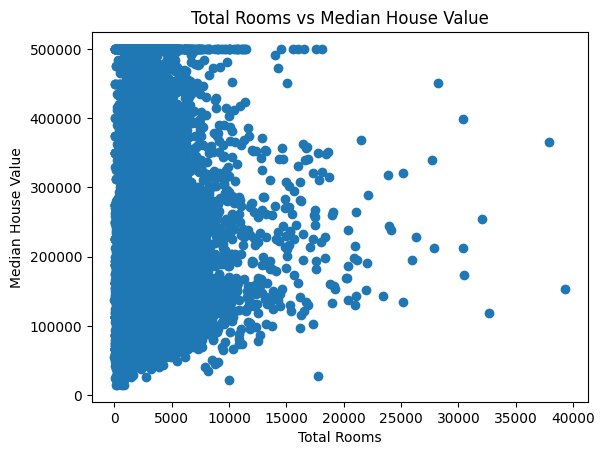

                            longitude  latitude  housing_median_age  \
longitude                    1.000000 -0.924664           -0.108197   
latitude                    -0.924664  1.000000            0.011173   
housing_median_age          -0.108197  0.011173            1.000000   
total_rooms                  0.044568 -0.036100           -0.361262   
total_bedrooms               0.069608 -0.066983           -0.320451   
population                   0.099773 -0.108785           -0.296244   
households                   0.055310 -0.071035           -0.302916   
median_income               -0.015176 -0.079809           -0.119034   
median_house_value          -0.045967 -0.144160            0.105623   
ocean_proximity_<1H OCEAN    0.321121 -0.446969            0.045300   
ocean_proximity_INLAND      -0.055575  0.351166           -0.236645   
ocean_proximity_ISLAND       0.009446 -0.016572            0.017020   
ocean_proximity_NEAR BAY    -0.474489  0.358771            0.255172   
ocean_

In [3]:
# Använd one-hot encoding för att omvandla 'ocean_proximity' till numerisk form
data_encoded = pd.get_dummies(data, columns=['ocean_proximity'])

# Utforska sambandet mellan olika variabler och huspriser
plt.scatter(data_encoded['total_rooms'], data_encoded['median_house_value'])
plt.xlabel('Total Rooms')
plt.ylabel('Median House Value')
plt.title('Total Rooms vs Median House Value')
plt.show()

# Beräkna korrelationer på den omvandlade datan
correlation_matrix = data_encoded.corr()
print(correlation_matrix)

In [26]:
# Check if 'ocean_proximity' exists in the dataset
if 'ocean_proximity' in data.columns:
    data = pd.get_dummies(data, columns=['ocean_proximity'])

# Separera oberoende variabler (features) och beroende variabel (target)
features = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
# Include all one-hot encoded columns of 'ocean_proximity'
features += [col for col in data.columns if col.startswith('ocean_proximity')]
X = data[features]
y = data['median_house_value']

# Dela datan in i tränings- och testuppsättningar
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_test, X_test, y_train_test, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# Skapa en instans av SimpleImputer
imputer = SimpleImputer(strategy='median')

# Fyll i de saknade värdena i både tränings- och testdatan
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)
X_train_test_imputed = imputer.fit_transform(X_train_test)
X_test_imputed = imputer.transform(X_test)

# Lista för att lagra RMSE-värden för varje modell
rmse_scores = {}

In [11]:
# Skapa en instans av modellen och träna den på den imputerade träningsdatan
model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Förutsäg huspriser på den imputerade testdatan
y_pred = model.predict(X_val_imputed)

# Utvärdera modellen genom att beräkna medelkvadratisk avvikelse (MSE)
rmse = root_mean_squared_error(y_val, y_pred)
print("Linear Regression - Root Mean Squared Error:", rmse)
rmse_scores['Linear Regression'] = rmse

Linear Regression - Root Mean Squared Error: 71686.78672829215


In [12]:
# Skapa en instans av modellen
tree_model = DecisionTreeRegressor(random_state=42)

# Träna modellen på den imputerade träningsdatan
tree_model.fit(X_train_imputed, y_train)

# Förutsäg huspriser på den imputerade testdatan
y_pred_tree = tree_model.predict(X_val_imputed)

# Utvärdera modellen genom att beräkna medelkvadratisk avvikelse (MSE)
rmse_tree = root_mean_squared_error(y_val, y_pred_tree)
print("Decision Tree - Root Mean Squared Error:", rmse_tree)
rmse_scores['Decision Tree Regressor'] = rmse_tree

Decision Tree - Root Mean Squared Error: 89796.53429188982


In [13]:
# Skapa en instans av modellen och träna den på den imputerade träningsdatan
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train_imputed, y_train)

# Förutsäg huspriser på den imputerade testdatan
y_pred_forest = forest_model.predict(X_val_imputed)

# Utvärdera modellen genom att beräkna medelkvadratisk avvikelse (MSE) och avrunda till två decimaler
rmse_forest = root_mean_squared_error(y_val, y_pred_forest)
print("Random Forest - Root Mean Squared Error:", rmse_forest)
rmse_scores['Random Forest Regressor'] = rmse_forest

Random Forest - Root Mean Squared Error: 66519.4570109441


In [14]:
# Skapa en instans av modellen
svm_model = SVR(kernel='linear')

# Träna modellen på den imputerade träningsdatan
svm_model.fit(X_train_imputed, y_train)

# Förutsäg huspriser på den imputerade testdatan
y_pred_svm = svm_model.predict(X_val_imputed)

# Utvärdera modellen genom att beräkna medelkvadratisk avvikelse (MSE) och avrunda till två decimaler
rmse_svm = root_mean_squared_error(y_val, y_pred_svm)
print("SVR - Root Mean Squared Error:", rmse_svm)
rmse_scores['Support Vector Machine'] = rmse_svm

SVR - Root Mean Squared Error: 97171.72593930464


In [15]:
# Print RMSE for each model
for model, rmse in rmse_scores.items():
    rmse_int = int(rmse)
    print(f"{model} Root Mean Squared Error: {rmse_int}")

# Determine the best model based on RMSE
best_model_name = min(rmse_scores, key=rmse_scores.get)
best_model_rmse = int(rmse_scores[best_model_name])

best_model_result = f"Best model is: {best_model_name} with RMSE of {best_model_rmse}"

best_model_result

Linear Regression Root Mean Squared Error: 71686
Decision Tree Regressor Root Mean Squared Error: 89796
Random Forest Regressor Root Mean Squared Error: 66519
Support Vector Machine Root Mean Squared Error: 97171


'Best model is: Random Forest Regressor with RMSE of 66519'

In [28]:
# Train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_test_imputed, y_train_test)

# Calculate predictions on the test set
y_pred_test = rf_model.predict(X_test_imputed)

# Calculate RMSE on the test set
rmse_test = root_mean_squared_error(y_test, y_pred_test)

# Print the RMSE and the expected value
expected_value = 65000
print("Root Mean Squared Error (RMSE) test data :", rmse_test)
print("Expected value:", expected_value)

Root Mean Squared Error (RMSE) test data : 65121.9742954375
Expected value: 65000
